In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
sys.path.append('dynamic-coattention-network-plus')
sys.path.append('dynamic-coattention-network-plus/question_answering')
import tensorflow as tf 
from duplicate_questions.models.siamese_bilstm.siamese_bilstm import SiameseBiLSTM
from utils import get_data_paths
import numpy as np
import seaborn
from matplotlib import figure
from matplotlib import pyplot as plt
from question_answering.dataset import SquadDataset
from main import to_siamese, ImportModel
import json

/Users/Arnav/anaconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Tensorflow Version ---------->  1.4.0


In [4]:
data_dir = 'dynamic-coattention-network-plus/data/squad'
embed_path = "dynamic-coattention-network-plus/data/squad/glove.trimmed.300.npz"
max_q_len = 40
max_p_len = 400
siamese_model_num = '04'
embeddings = np.load(embed_path)['glove']

In [5]:
# get config file for siamese model
siamese_config = 'paraphrase-id-tensorflow-master/logs/baseline_siamese/{}/trainparams.json'.format(siamese_model_num)
with open(siamese_config, 'r') as f:
    siamese_config = json.load(f)
    siamese_config['mode'] = 'test'
    siamese_config['input_sequence_length'] = 40
checkpoint_dir = 'paraphrase-id-tensorflow-master/models/baseline_siamese/{}/'.format(siamese_model_num)
siamese_graph = ImportModel(checkpoint_dir, siamese_config, embeddings)

INFO:duplicate_questions.models.base_tf_model:Building graph...


INFO:tensorflow:Restoring parameters from paraphrase-id-tensorflow-master/models/baseline_siamese/04/baseline_siamese-04-10


INFO:tensorflow:Restoring parameters from paraphrase-id-tensorflow-master/models/baseline_siamese/04/baseline_siamese-04-10


In [6]:
val_words_dir = data_dir + '/val.question'
with open(val_words_dir, 'r') as f:
    lines = f.readlines()
    all_questions = [x.split() for x in lines]
    pass

In [7]:
dev = SquadDataset(*get_data_paths(data_dir, name='val'),
                         max_question_length=max_q_len,
                         max_paragraph_length=max_p_len)

In [33]:
feed_dict_inputs = dev.get_batch(1, replace = False, shuffle = False)
question, paragraphs, question_lengths, paragraph_lengths, answers = feed_dict_inputs
M, m, A, a = siamese_graph.run(question)
question_words = all_questions[dev.epoch_sampled-1]
print('Question #' + str(dev.epoch_sampled))
print(question)
print(question_words)
print(question_lengths)


Question #18
([32, 13, 3, 149, 3562, 611, 9, 21, 2452, 8, 3, 8827, 132, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],)
['What', 'was', 'the', 'largest', 'ocean', 'referred', 'to', 'that', 'existed', 'in', 'the', 'Devonian', 'period', '?']
(14,)


In [34]:
A.shape

(1, 40, 40)

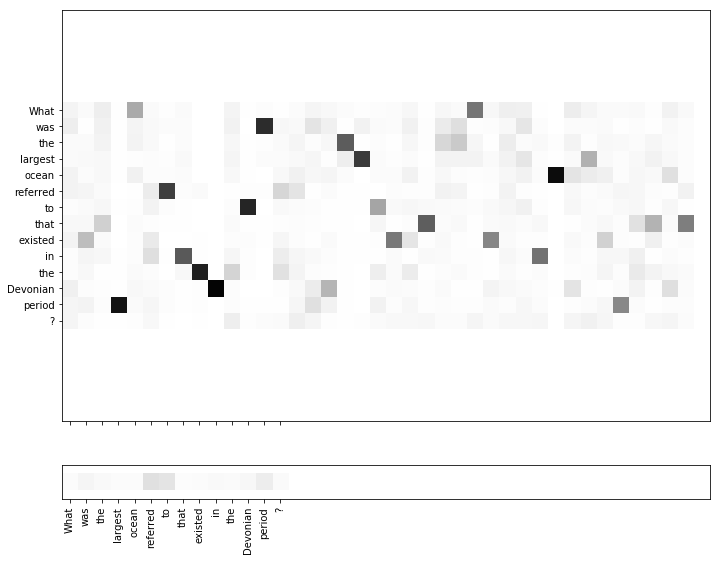

In [89]:
curtail = -1#len(question_words)
cmap = 'Greys'
heat_map = A[0, :curtail, :len(question_words)].T

'''
plt.figure(figsize = ((40/31)*9, 9))
plt.imshow(heat_map, vmin=0, vmax=1., cmap = cmap)
plt.xticks(np.arange(len(question_words)), question_words, rotation='vertical')
plt.yticks(np.arange(len(question_words)), question_words)
plt.show()

#plt.figure(figsize = (20,1))
#figure.figaspect(4.)
plt.imshow(a[0], vmin=0, vmax=1., cmap = cmap)
plt.xticks(np.arange(len(question_words)), question_words, rotation='vertical')
plt.yticks([])
plt.show()
'''

f, axarr = plt.subplots(2, sharex=True, gridspec_kw = {'height_ratios':[len(question_words)-2, 1]}, figsize=((40/31)*9, 9))
axarr[0].imshow(heat_map, vmin=0, vmax=1., cmap = cmap)
#axarr[0].xticks(, , )
#axarr[0].yticks(, )

plt.setp(axarr[0], xticks=[], xticklabels=[],
        yticks=np.arange(len(question_words)), yticklabels = question_words)
#for tick in axarr[0].get_xticklabels():
#        tick.set_rotation(90)


axarr[1].imshow(a[0], vmin=0, vmax=1., cmap = cmap)
#axarr[1].xticks(np.arange(len(question_words)), question_words, rotation='vertical')
#axarr[1].yticks([])

plt.setp(axarr[1], xticks=np.arange(len(question_words)), xticklabels=question_words,
        yticks=[], yticklabels = [])
for tick in axarr[1].get_xticklabels():
        tick.set_rotation(90)
plt.show()

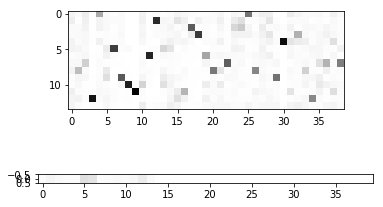

In [87]:
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan = 5)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan = 5)
#f, axarr = plt.subplots(2, sharex=True, gridspec_kw = {'height_ratios':[len(question_words), 1]}, figsize=((40/31)*9, 9))

ax1.imshow(heat_map, vmin=0, vmax=1., cmap = cmap)
#axarr[0].xticks(, , )
#axarr[0].yticks(, )

plt.setp(axarr[0], xticks=[], xticklabels=[],
        yticks=np.arange(len(question_words)), yticklabels = question_words)
#for tick in axarr[0].get_xticklabels():
#        tick.set_rotation(90)


ax2.imshow(a[0], vmin=0, vmax=1., cmap = cmap)
#axarr[1].xticks(np.arange(len(question_words)), question_words, rotation='vertical')
#axarr[1].yticks([])

plt.setp(axarr[1], xticks=np.arange(len(question_words)), xticklabels=question_words,
        yticks=[], yticklabels = [])
for tick in axarr[1].get_xticklabels():
        tick.set_rotation(90)
plt.show()

In [ ]:
print(np.sum(A[0], axis = 1))
#print(a[0])
print(np.sum(a[0, 0, :]))

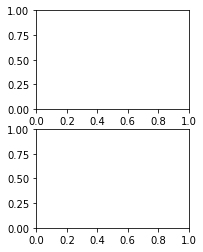